## Linear Least Squares Fitting

#### Import as usual

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#### Generate random data about a trendline

In [4]:
# Set random number seed
np.random.seed(119)

# Set # of data points
npoints = 50

# Set x variable
x = np.linspace(0, 10., npoints)

# Set slope, intercept & scatter RMS
m = 2.0
b = 1.0
sigma = 2.0

# Generate y points
y = m*x + b + np.random.normal(scale=sigma, size=npoints)
y_err = np.full(npoints, sigma)

#### Plot the data


Text(0, 0.5, 'y')

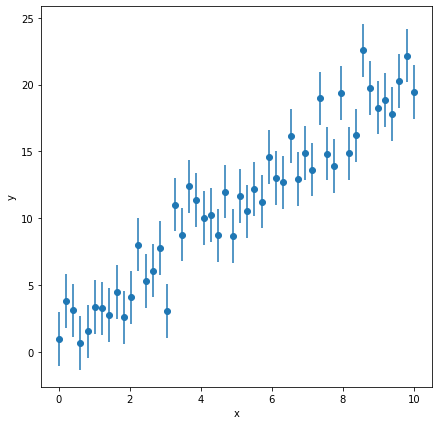

In [6]:
f = plt.figure(figsize=(7, 7))
plt.errorbar(x, y, sigma, fmt='o')
plt.xlabel('x')
plt.ylabel('y')

#### Method 1: polyfit()

In [11]:
# Weight with uncertainties
m_fit, b_fit = np.poly1d(np.polyfit(x, y, 1, w=1./y_err))
print("Best fit slope = ", m_fit)
print("Best fit intercept = ", b_fit)

y_fit = m_fit * x + b_fit

Best fit slope =  1.9634043470399523
Best fit intercept =  1.2830106812961977


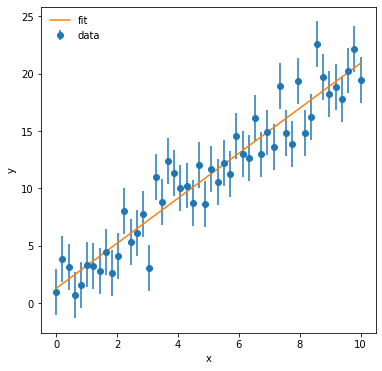

In [9]:
f = plt.figure(figsize=(6, 6))
plt.errorbar(x, y, sigma, fmt='o', label='data')
plt.plot(x, y_fit, label="fit")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2, frameon=False)



### Method 2: scipy & optimize

In [14]:
# Import scipy from scipy
from scipy import optimize

# Define the fxn's to fit
def f_line(x, m, b):
    return m*x + b

# Perform fit
params, params_cov = optimize.curve_fit(f_line, x, y, sigma=y_err)

m_fit_2 = params[0]
b_fit_2 = params[1] 
print(m_fit_2, b_fit_2)

1.9634043457508432 1.2830106890542259


In [13]:
print(m_fit, b_fit)

1.9634043470399523 1.2830106812961977


In [ ]:
f = plt.figure(figsize=(6, 6))
plt.errorbar(x, y, sigma, fmt='o', label='data')
plt.plot(x, y_fit, label="fit")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2, frameon=False)